In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

In [50]:
import numpy as np

In [37]:
ruta_archivo = r'D:\\CONTRATOS 2024\\LEANDRO DOCUMENTOS\\LEANDRO DOCUMENTOS\\UNIVERSIDAD\\SEXTO SEMESTRE\\ANALISIS DE DATOS\\TAREA 3\\3 ARBOLES DE DECISIONES\\winequality-red.csv'


In [39]:
datos = pd.read_csv(ruta_archivo)

In [40]:
print(datos.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [41]:
print(datos.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [42]:
print(datos.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Suponiendo que 'quality' es la variable objetivo
X = datos.drop('quality', axis=1)
y = datos['quality']

In [47]:
# Crear un modelo de bosque aleatorio
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)



RandomForestClassifier(random_state=42)

In [51]:
# Obtener la importancia de cada característica
importancias = forest.feature_importances_
indices = np.argsort(importancias)[::-1]


In [52]:
# Seleccionar las características más importantes
sfm = SelectFromModel(forest, threshold=0.05)
sfm.fit(X, y)
X_transform = sfm.transform(X)

In [53]:
# Ver qué características son importantes
for i in indices:
    print(f"{X.columns[i]}: {importancias[i]}")

alcohol: 0.1516983016690644
sulphates: 0.11240187242889099
total sulfur dioxide: 0.10372226344832501
volatile acidity: 0.10060621194908351
density: 0.08890462259204625
chlorides: 0.0785350860188989
fixed acidity: 0.07553451737865999
pH: 0.07539241902754867
citric acid: 0.07414993005602813
residual sugar: 0.07288228015389774
free sulfur dioxide: 0.06617249527755643


In [54]:
# Ver las características seleccionadas para el modelo
selected_features = X.columns[(sfm.get_support())]
print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [55]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Imprimir un informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480



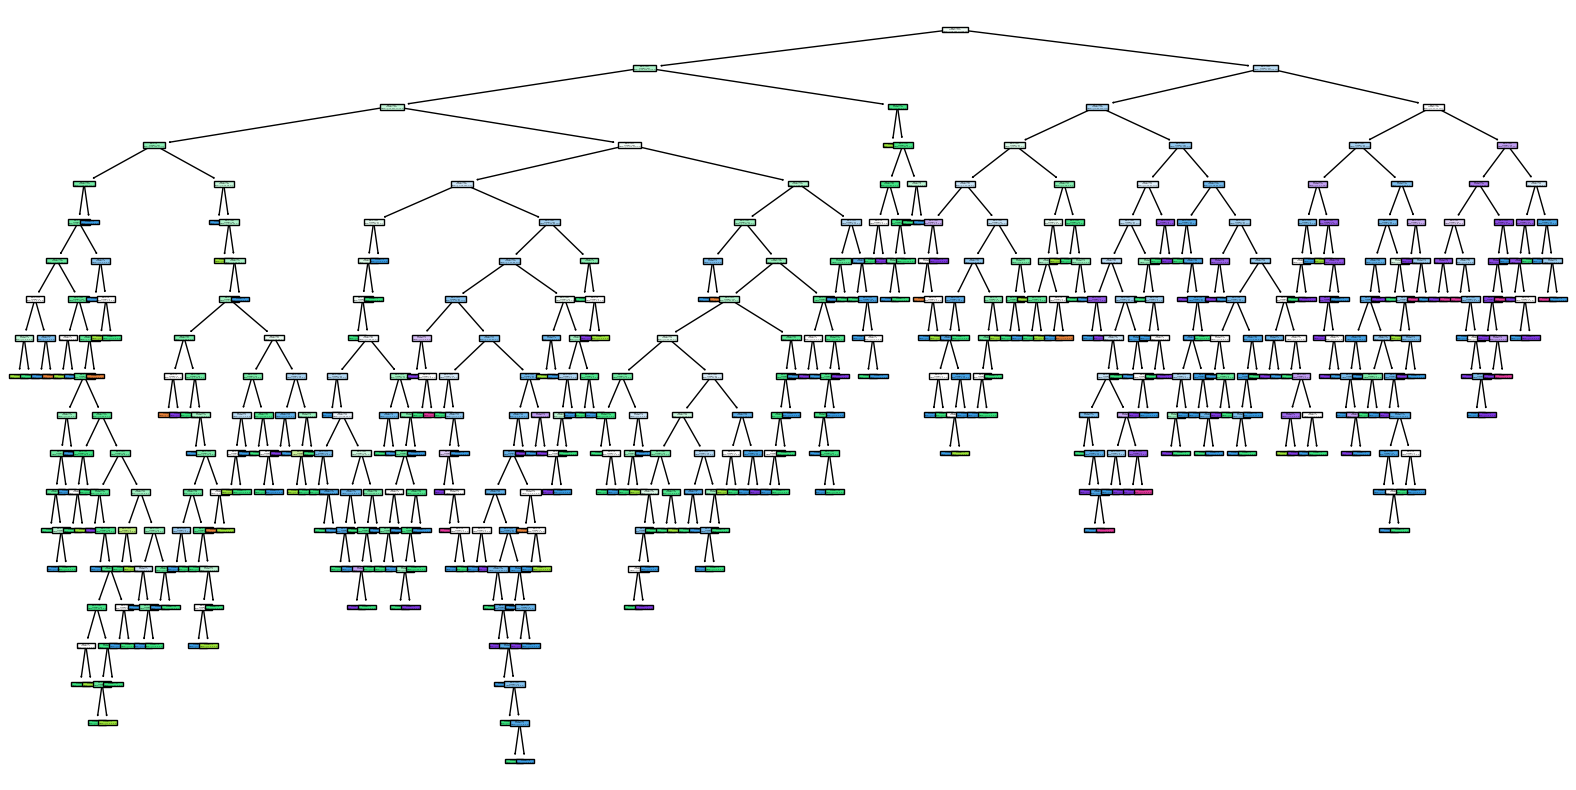

In [60]:
# Después usa el modelo entrenado en la función plot_tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, filled=True, feature_names=selected_features)
plt.show()